In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import optimize
from ipywidgets import *
from IPython.display import SVG
from sklearn import datasets


In [21]:
AND = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,0,0,1)})
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


First, we need to initialize weights to small, random values (can be positive and negative).

In [22]:
w = np.random.randn(3)*1e-4

In [23]:
w

array([ 1.11899995e-04,  7.70211253e-06, -1.17667468e-05])

Then, a simple activation function for calculating $g(h)$:

In [24]:
g = lambda inputs, weights: np.where(np.dot(inputs, weights)>0, 1, 0)

Finally, a training function that iterates the learning algorithm, returning the adapted weights.

In [25]:
def train(inputs, targets, weights, eta, n_iterations):

    # Add the inputs that match the bias node
    inputs = np.c_[inputs, -np.ones((len(inputs), 1))]

    for n in range(n_iterations):

        activations = g(inputs, weights);
        weights -= eta*np.dot(np.transpose(inputs), activations - targets)
        
    return(weights)

Let's test it first on the AND function.

In [28]:
inputs = AND[['x1','x2']]
target = AND['y']

w = train(inputs, target, w, 0.3, 20)

Checking the performance:

In [29]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 0, 0, 1])

Thus, it has learned the function perfectly. Now for OR:

In [30]:
OR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,1)})
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [31]:
w = np.random.randn(3)*1e-4

In [32]:
inputs = OR[['x1','x2']]
target = OR['y']

w = train(inputs, target, w, 0.25, 20)

In [33]:
g(np.c_[inputs, -np.ones((len(inputs), 1))], w)

array([0, 1, 1, 1])

Also 100% correct.

### Exercise: XOR

Now try running the model on the XOR function, where a one is returned for either `x1` or `x2` being true, but *not* both. What happens here?

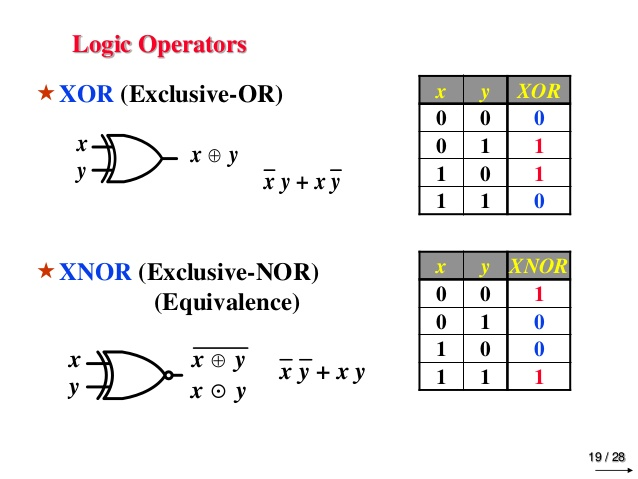

In [34]:
w = np.random.randn(3)*1e-4
w

array([ 7.01173687e-05, -1.04997928e-04,  5.82055417e-05])

In [35]:
# Write your answer here
XOR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,0)})
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [36]:
w = np.random.randn(3)*1e-4
inputs = OR[['x1','x2']]
target = OR['y']

w = train(inputs, target, w, 0.25, 20)

Let's explore the problem graphically:

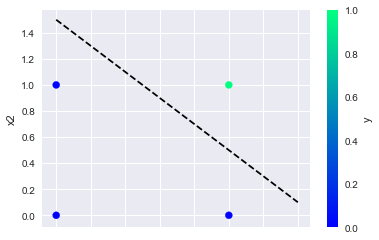

In [37]:
AND.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter')
plt.plot(np.linspace(0,1.4), 1.5 - 1*np.linspace(0,1.4), 'k--');

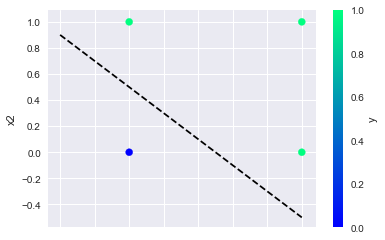

In [38]:
OR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter')
plt.plot(np.linspace(-.4,1), .5 - 1*np.linspace(-.4,1), 'k--');

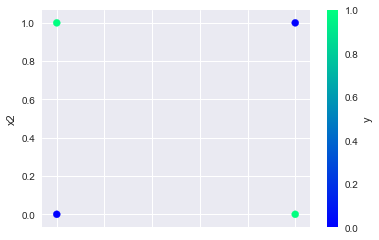

In [39]:
XOR = pd.DataFrame({'x1': (0,0,1,1), 'x2': (0,1,0,1), 'y': (0,1,1,0)})

XOR.plot(kind='scatter', x='x1', y='x2', c='y', s=50, colormap='winter');